# Veri

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X = np.array([
    [1,2,4],
    [2,-2,9],
    [3,2,12],
    [4,-2,21],
    [5,2,23],
])

# standardization
X_normal = (X - X.mean(axis = 0))/(X.std(axis = 0))
X_normal

array([[-1.41421356,  0.81649658, -1.36216257],
       [-0.70710678, -1.22474487, -0.66718167],
       [ 0.        ,  0.81649658, -0.25019312],
       [ 0.70710678, -1.22474487,  1.0007725 ],
       [ 1.41421356,  0.81649658,  1.27876486]])

# Sklearn PCA

In [2]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_normal)

for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    print("\neigenvalue: {}".format(eigenvalue))
    print(eigenvector)
    print("eigenvector length: {}".format(eigenvector.dot(eigenvector.T)))


eigenvalue: 2.490302413639413
[-0.70041477  0.09705232 -0.70710678]
eigenvector length: 0.9999999999999997

eigenvalue: 1.2500000000000002
[-0.1372527  -0.99053606  0.        ]
eigenvector length: 1.0


# El yapimi PCA

In [3]:
COV = (1/(X.shape[0] - 1)) * X_normal.T.dot(X_normal)
ozdegerler, ozvektorler = np.linalg.eig(COV)

ozvektorler_tersi = np.linalg.inv(ozvektorler)
ozdegerler = ozdegerler

w1,w2, w3 = ozvektorler[:,0:1], ozvektorler[:,1:2], ozvektorler[:,2:]
print("\nOzvektor 1 : Temel Bilesen 1")
print(w1)
print("Ozdeger 1: {}".format(ozdegerler[0]))
print("eigenvector length: {}".format(w1.T.dot(w1)))

print("\nOzvektor 2 : Temel Bilesen 2")
print(w2)
print("Ozdeger 2: {}".format(ozdegerler[1]))
print("eigenvector length: {}".format(w2.T.dot(w2)))

print("\nOzvektor 3 : Temel Bilesen 3")
print(w3)
print("Ozdeger 2: {}".format(ozdegerler[2]))
print("eigenvector length: {}".format(w3.T.dot(w3)))


Ozvektor 1 : Temel Bilesen 1
[[ 0.70041477]
 [-0.09705232]
 [-0.70710678]]
Ozdeger 1: 0.009697586360586818
eigenvector length: [[1.]]

Ozvektor 2 : Temel Bilesen 2
[[ 0.70041477]
 [-0.09705232]
 [ 0.70710678]]
Ozdeger 2: 2.490302413639412
eigenvector length: [[1.]]

Ozvektor 3 : Temel Bilesen 3
[[ 1.37252703e-01]
 [ 9.90536065e-01]
 [-3.14764774e-17]]
Ozdeger 2: 1.25
eigenvector length: [[1.]]


# Verinin Geri Donusumu

In [4]:
z1 = X_normal.dot(w1)
z1

array([[-0.10658456],
       [ 0.09536498],
       [ 0.09767037],
       [-0.09352066],
       [ 0.00706988]])

In [5]:
w1T = ozvektorler_tersi[0:1]
w1T

array([[ 0.70041477, -0.09705232, -0.70710678]])

In [6]:
z1.dot(w1T)

array([[-0.0746534 ,  0.01034428,  0.07536667],
       [ 0.06679504, -0.00925539, -0.06743322],
       [ 0.06840977, -0.00947914, -0.06906338],
       [-0.06550325,  0.0090764 ,  0.06612909],
       [ 0.00495185, -0.00068615, -0.00499916]])

In [7]:
z2 = X_normal.dot(w2)
w2T = ozvektorler_tersi[1:2]

z3 = X_normal.dot(w3)
w3T = ozvektorler_tersi[2:]

z1.dot(w1T) + z2.dot(w2T) + z3.dot(w3T)

array([[-1.41421356e+00,  8.16496581e-01, -1.36216257e+00],
       [-7.07106781e-01, -1.22474487e+00, -6.67181666e-01],
       [-1.38777878e-17,  8.16496581e-01, -2.50193125e-01],
       [ 7.07106781e-01, -1.22474487e+00,  1.00077250e+00],
       [ 1.41421356e+00,  8.16496581e-01,  1.27876486e+00]])

In [8]:
X_normal

array([[-1.41421356,  0.81649658, -1.36216257],
       [-0.70710678, -1.22474487, -0.66718167],
       [ 0.        ,  0.81649658, -0.25019312],
       [ 0.70710678, -1.22474487,  1.0007725 ],
       [ 1.41421356,  0.81649658,  1.27876486]])

In [9]:
X_normal.dot(ozvektorler).dot(ozvektorler_tersi)

array([[-1.41421356e+00,  8.16496581e-01, -1.36216257e+00],
       [-7.07106781e-01, -1.22474487e+00, -6.67181666e-01],
       [ 3.56711290e-17,  8.16496581e-01, -2.50193125e-01],
       [ 7.07106781e-01, -1.22474487e+00,  1.00077250e+00],
       [ 1.41421356e+00,  8.16496581e-01,  1.27876486e+00]])

# Anomali Tespiti

In [24]:
X1 = np.random.randn(1000,1)
X2 = np.random.randn(1000,1)

# Generate test data with the special pattern X3 = - X1 - X2
# REMEMBER: 
  # This is the pattern that is fed to the AutoEncoder in the training phase
  # At training phase, AutoEncoder succesfully learned to encode and decode that pattern
X = np.concatenate([X1, X2, - X1 - X2], axis = 1)

# Inject anomaly: without the pattern such that X3 = - X1 - X2
X[:100] = np.random.randn(100,3)
# standardization
X_normal = (X - X.mean(axis = 0))/(X.std(axis = 0))
X_normal

array([[ 0.70178542,  0.73083915, -0.26303123],
       [ 1.73809601, -0.28526034, -0.15837587],
       [-0.72132   , -1.1567106 , -0.97885882],
       ...,
       [ 0.03872626, -0.35373986,  0.24417658],
       [-0.55996611,  1.39324623, -0.56674409],
       [-0.97464354, -2.50937847,  2.4939911 ]])

In [13]:
COV = (1/(X.shape[0] - 1)) * X_normal.T.dot(X_normal)
ozdegerler, ozvektorler = np.linalg.eig(COV)

ozvektorler_tersi = np.linalg.inv(ozvektorler)
ozdegerler = ozdegerler

w1,w2, w3 = ozvektorler[:,0:1], ozvektorler[:,1:2], ozvektorler[:,2:]
print("\nOzvektor 1 : Temel Bilesen 1")
print(w1)
print("Ozdeger 1: {}".format(ozdegerler[0]))
print("eigenvector length: {}".format(w1.T.dot(w1)))

print("\nOzvektor 2 : Temel Bilesen 2")
print(w2)
print("Ozdeger 2: {}".format(ozdegerler[1]))
print("eigenvector length: {}".format(w2.T.dot(w2)))

print("\nOzvektor 3 : Temel Bilesen 3")
print(w3)
print("Ozdeger 2: {}".format(ozdegerler[2]))
print("eigenvector length: {}".format(w3.T.dot(w3)))


Ozvektor 1 : Temel Bilesen 1
[[0.50261759]
 [0.50932681]
 [0.69854259]]
Ozdeger 1: 0.07427573733224846
eigenvector length: [[1.]]

Ozvektor 2 : Temel Bilesen 2
[[ 7.12262361e-01]
 [-7.01912980e-01]
 [-7.05025768e-04]]
Ozdeger 2: 1.0445756341322026
eigenvector length: [[1.]]

Ozvektor 3 : Temel Bilesen 3
[[-0.48995702]
 [-0.49789995]
 [ 0.71556813]]
Ozdeger 2: 1.8841516315385514
eigenvector length: [[1.]]


In [16]:
z1 = X_normal.dot(w1)
w1T = ozvektorler_tersi[0:1]

z2 = X_normal.dot(w2)
w2T = ozvektorler_tersi[1:2]

z3 = X_normal.dot(w3)
w3T = ozvektorler_tersi[2:]

z1.dot(w1T) + z2.dot(w2T) + z3.dot(w3T)

array([[-0.44421977, -1.04682332, -0.99033428],
       [-0.9955065 , -0.2219772 , -0.18733672],
       [ 0.8193525 ,  0.29698507,  1.64084533],
       ...,
       [-0.35155525, -1.32935446,  1.22286614],
       [ 0.15682742,  0.98817174, -0.8531967 ],
       [-0.11696329, -0.51425027,  0.45143273]])

In [15]:
N = z2.dot(w2T) + z3.dot(w3T)
N

array([[ 0.28369039, -0.3091966 ,  0.02132202],
       [-0.62141793,  0.15710491,  0.33257505],
       [-0.0397636 , -0.57359899,  0.4468378 ],
       ...,
       [-0.3517816 , -1.32958384,  1.22255155],
       [ 0.16379754,  0.99523491, -0.84350955],
       [-0.11426711, -0.5115181 ,  0.4551799 ]])

In [17]:
X_normal - N 

array([[-7.27910164e-01, -7.37626718e-01, -1.01165630e+00],
       [-3.74088572e-01, -3.79082117e-01, -5.19911767e-01],
       [ 8.59116103e-01,  8.70584068e-01,  1.19400753e+00],
       ...,
       [ 2.26358283e-04,  2.29379841e-04,  3.14594842e-04],
       [-6.97012546e-03, -7.06316661e-03, -9.68714502e-03],
       [-2.69617855e-03, -2.73216866e-03, -3.74717396e-03]])

In [18]:
A = z1.dot(w1T)
A

array([[-7.27910164e-01, -7.37626718e-01, -1.01165630e+00],
       [-3.74088572e-01, -3.79082117e-01, -5.19911767e-01],
       [ 8.59116103e-01,  8.70584068e-01,  1.19400753e+00],
       ...,
       [ 2.26358283e-04,  2.29379841e-04,  3.14594842e-04],
       [-6.97012546e-03, -7.06316661e-03, -9.68714502e-03],
       [-2.69617855e-03, -2.73216866e-03, -3.74717396e-03]])

In [22]:
A2 = A**2
E = A2.sum(axis = 1)

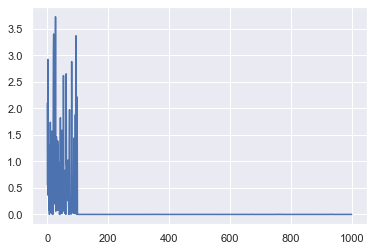

In [23]:
plt.plot(E)